# Fase 5: Simulación de Monte Carlo

Resolver el problema clásico de Merton usando simulaciones de Monte Carlo. Para
esto, usando los parámetros $S(0) = 112$, $K = 115$, $r = 0,08$, $σ = 0,18$ y $T = 1$ deberán:

In [1]:
#Importo mis librerías
import numpy as np
import matplotlib.pyplot as plt
import Funciones

### Parámetros iniciales

Definimos los parámetros iniciales necesarios para la simulación de Monte Carlo.

In [2]:
# Defino los parámetros iniciales
S0 = 112      # Precio inicial del activo
K = 115       # Precio de ejercicio
r = 0.08      # Tasa libre de riesgo
sigma = 0.18  # Volatilidad
T = 1         # Tiempo a vencimiento (en años)
N = 252       # Número de pasos de tiempo (1 año con pasos diarios laborales)
n_paths = 10000  # Número de trayectorias

## Simular trayectorias de precio del activo

Simular trayectorias de precio del activo usando movimientos brownianos, en un
mundo riesgo neutral.

Para simular trayectorias de precios del activo en un mundo riesgo neutral, utilizamos la fórmula del movimiento browniano geométrico. La ecuación para el precio del activo $S_t$ en un mundo riesgo neutral es:
\begin{equation*}
    S_t = S_0 \exp\left( \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t \right)
\end{equation*}

In [3]:
#Simulo trayectorias en mundo riesgo-neutral
t, paths = Funciones.simulate_gbm(S0, r, sigma, T, N, n_paths)

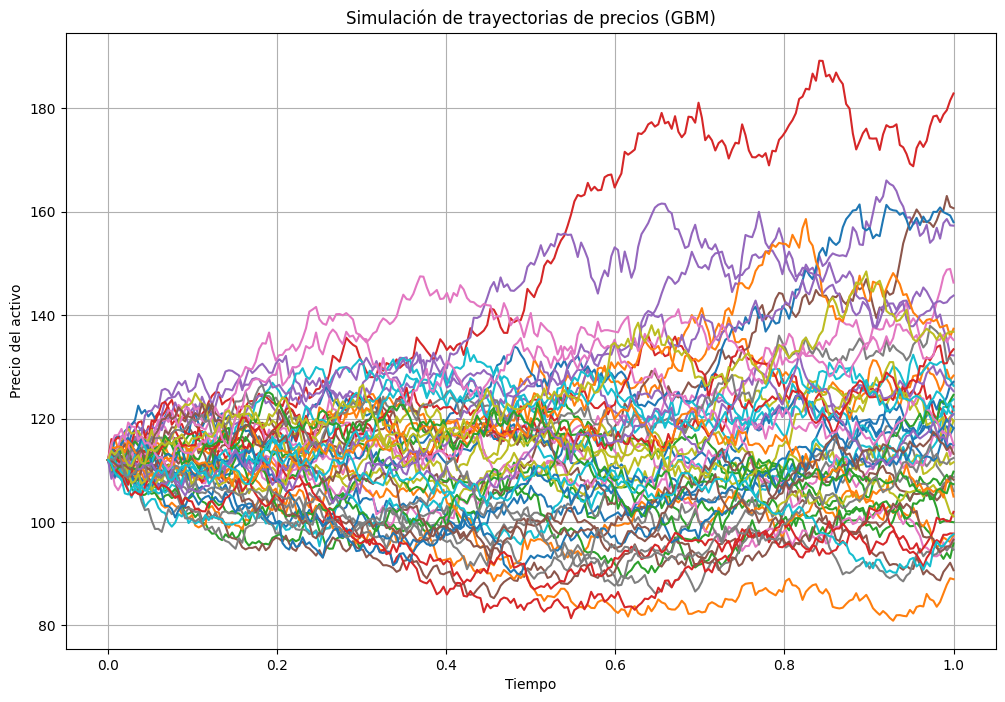

In [4]:
#Grafico algunas trayectorias simuladas
plt.figure(figsize=(12, 8))
for i in range(50):
    plt.plot(t, paths[i])
plt.title("Simulación de trayectorias de precios (GBM)")
plt.xlabel("Tiempo")
plt.ylabel("Precio del activo")
plt.grid(True)
plt.show()

## Calcular el valor PUT y comparar

Calcular el valor de una opción PUT europea por el método de Monte-Carlo y
comparar resultados con la solución obtenida por la fórmula de Black-Scholes.

Para calcular el valor de una opción PUT europea usando el método de Monte Carlo, seguimos estos pasos:
1. Simulamos un gran número de trayectorias del precio del activo subyacente al vencimiento $T$.   
2. Para cada trayectoria, calculamos el valor de la opción PUT al vencimiento.
3. Promediamos los valores obtenidos y descontamos al valor presente para obtener el valor de la opción PUT.
4. Comparamos el resultado con el valor obtenido por la fórmula de Black-Scholes.

Para calcular el valor de una opción PUT europea hacemos lo siguiente:
Calculamos el payoff y posteriormente el valor presente de la opción PUT. El payoff de una opción PUT es:
\begin{equation*}
    \text{Payoff} = \max(K - S_T, 0)
\end{equation*}
El valor presente de la opción PUT se calcula como:
\begin{equation*}
    P = e^{-rT} \mathbb{E}[\text{Payoff}]  
\end{equation*}
Para calcular la esperanza del payoff, simulamos $N$ trayectorias del precio del activo al vencimiento $T$ y calculamos el promedio de los payoffs obtenidos.

La fórmula de Black-Scholes para el valor de una opción PUT europea es:
\begin{equation*}
    P = K e^{-rT} N(-d_2) - S_0 N(-d_1)
\end{equation*}
donde: 
\begin{align*}
    d_1 &= \frac{\ln(S_0 / K) + (r + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}} \\
    d_2 &= d_1 - \sigma \sqrt{T}
\end{align*}


In [5]:
#Extraemos los precios terminales
ST = paths[:, -1]

#Calculamos el valor de la opción PUT por Monte Carlo
put_mc=Funciones.valor_put(ST, K, T,r)

print(f"Precio estimado de la opción PUT (Monte Carlo): {put_mc:.4f}")

Precio estimado de la opción PUT (Monte Carlo): 5.2045


In [6]:
#Calculamos el valor de la opción PUT con fórmula de Black-Scholes
put_bs= Funciones.black_scholes_put(S0, K, T, r, sigma)
print(f"Precio de la opción PUT (Black-Scholes): {put_bs:.4f}")

Precio de la opción PUT (Black-Scholes): 5.2444


In [7]:
#Hacemos la comparación de los precios
error_absoluto = abs(put_mc - put_bs)
error_relativo = error_absoluto / put_bs * 100

print(f"Error absoluto: {error_absoluto:.4f}")
print(f"Error relativo: {error_relativo:.2f}%")

Error absoluto: 0.0399
Error relativo: 0.76%


## Calcular el valor de una opción Binaria

Calcular el valor de una opción Binaria por el método de Monte-Carlo.

Para calcular el valor de una opción binaria usando el método de Monte Carlo, seguimos un proceso similar al de la opción PUT, pero con un enfoque diferente en el payoff. El payoff de una opción binaria es:
\begin{equation*}
    \text{Payoff} = \begin{cases}
        1 & \text{si } S_T > K \\
        0 & \text{si } S_T \leq K
    \end{cases}
\end{equation*}
El valor presente de la opción binaria se calcula como:
\begin{equation*}
    B = e^{-rT} \mathbb{E}[\text{Payoff}]
\end{equation*}
Para calcular la esperanza del payoff, simulamos $N$ trayectorias del precio del activo al vencimiento $T$ y calculamos el promedio de los payoffs obtenidos.

In [8]:
#Calculamos la opción binaria
precio_binario = Funciones.binaria_montecarlo(ST, K, T, r)

print(f"Valor de la opción binaria (put) por Monte Carlo: {precio_binario:.4f}")

Valor de la opción binaria (put) por Monte Carlo: 0.3807


## Calcular el error

En ambos casos, calcular el error en términos del numero de iteraciones de Monte-
Carlo

Para calcular el valor binario con la formula de Black-Scholes, utilizamos:
\begin{equation*}
    B = e^{-rT} N(d_2)
\end{equation*}
donde $N(d_2)$ es la función de distribución acumulativa de la normal estándar evaluada en $d_2$.
Para calcular el error en términos del número de iteraciones de Monte Carlo, calculamos el error absoluto entre el valor obtenido por Monte Carlo y el valor teórico de Black-Scholes. El error se puede expresar como:
\begin{equation*}
    \text{Error} = \left| \text{Valor Monte Carlo} - \text{Valor Black-Scholes} \right|
\end{equation*}


In [ ]:
#Simulo para diferentes números de iteraciones
n_iteraciones=[100, 500, 1000, 5000, 10000, 50000,100000,200000,500000,1000000]
errores_put=[]
errores_binario=[]

#Calculamos el valor de la opción binaria con Black-Scholes
binario_put =Funciones.binaria_black_scholes(S0, K, T, r, sigma)

#Repetimos el cálculo de Monte Carlo para diferentes números de iteraciones
for n in n_iteraciones:
    #Simulamos trayectorias
    _, paths =Funciones.simulate_gbm(S0, r, sigma, T, N, n)
    ST=paths[:,-1]

    #Errores PUT
    put_mc=Funciones.valor_put(ST, K, T, r)
    error_put=abs(put_mc - put_bs)
    errores_put.append(error_put)

    #Errores Binario
    precio_binario = Funciones.binaria_montecarlo(ST, K, T, r)
    error_binario = abs(precio_binario - binario_put)
    errores_binario.append(error_binario)

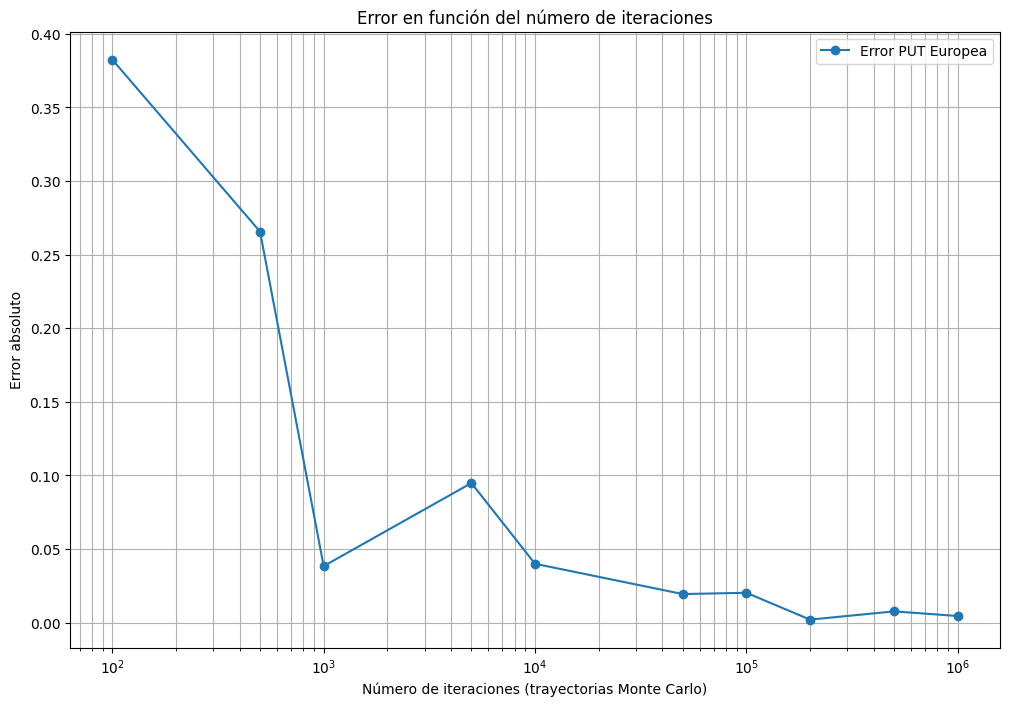

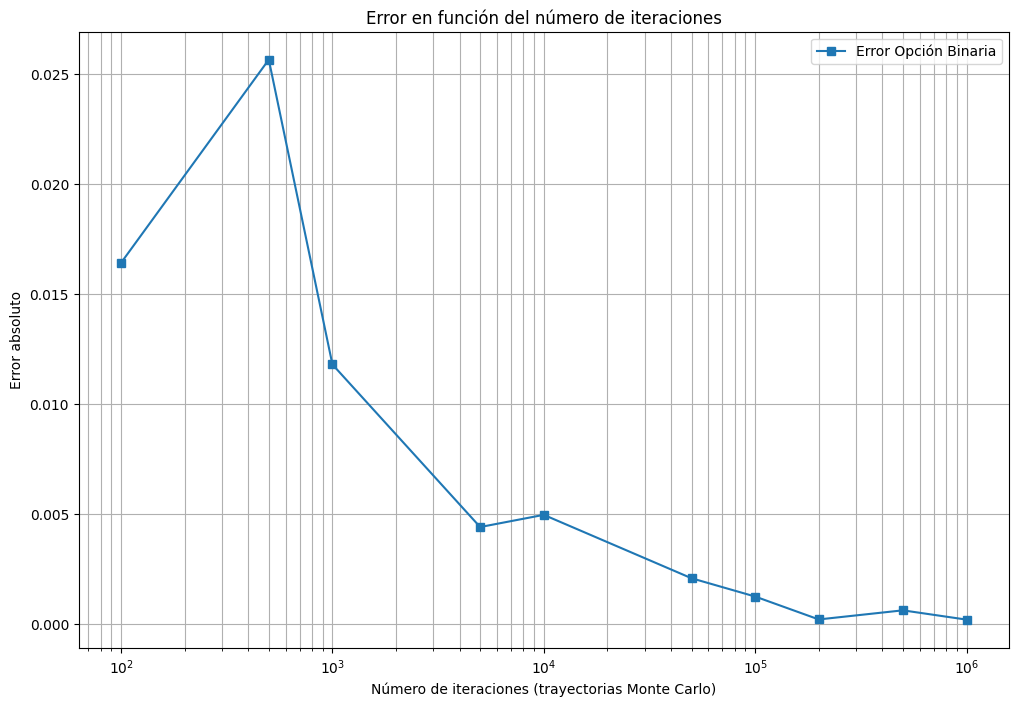

In [15]:
#Grafico de errores
plt.figure(figsize=(12,8))
plt.plot(n_iteraciones, errores_put, label='Error PUT Europea', marker='o')
plt.xlabel('Número de iteraciones (trayectorias Monte Carlo)')
plt.ylabel('Error absoluto')
plt.title('Error en función del número de iteraciones')
plt.legend()
plt.grid(True,which='both')
plt.xscale('log')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(n_iteraciones, errores_binario, label='Error Opción Binaria', marker='s')
plt.xlabel('Número de iteraciones (trayectorias Monte Carlo)')
plt.ylabel('Error absoluto')
plt.title('Error en función del número de iteraciones')
plt.legend()
plt.grid(True,which='both')
plt.xscale('log')
plt.show()